# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
df = pd.read_csv('lead_data_40k.csv')

/tmp/ipykernel_120793/1856237704.py:1: DtypeWarning: Columns (9,41,42,43,60,65,66,67,68,69,74,87,93,96,103,124,148,159,162,163,164) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lead_data_40k.csv')


In [3]:
df = df.sample(frac=1)

In [4]:
df.columns

Index(['id', 'leadinfo_id', 'childdetail_id', 'id-2', 'enquiry_no',
       'lead_relation', 'lead_name', 'lead_email_id', 'lead_income',
       'lead_contact_no',
       ...
       'system_generate_application_date', 'kbsc_appeared', 'grade_course_id',
       'other_detail-2', 'punch_in_date', 'admission_blocked',
       'admission_blocked_branch_id', 'admission_blocked_date',
       'system_generate_admission_blocked_date',
       'system_generate_admission_rejected_date'],
      dtype='object', length=165)

# Comparing Walk-in vs Admission Done

In [5]:
new_df = df[['walkin_completed','admission_completed']]

In [6]:
new_df

,walkin_completed,admission_completed
38413,True,True
16843,True,True
39157,True,True
17445,False,True
14649,False,True
...,...,...
27685,True,True
16595,True,True
35014,True,True
22903,False,True


In [7]:
new_df = new_df.replace({True: 1, False: 0})

In [8]:
new_df

,walkin_completed,admission_completed
38413,1,1
16843,1,1
39157,1,1
17445,0,1
14649,0,1
...,...,...
27685,1,1
16595,1,1
35014,1,1
22903,0,1


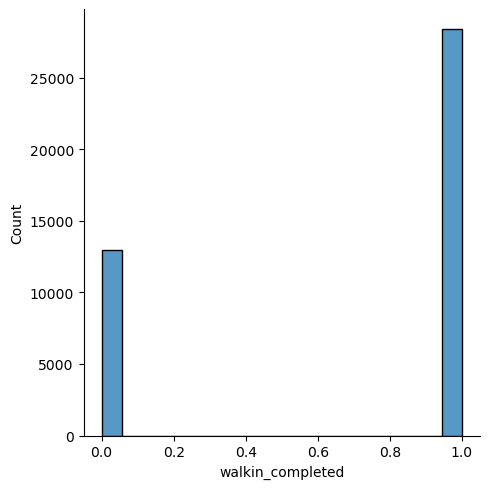

In [9]:
sns.displot(new_df['walkin_completed'])

In [10]:
new_df['walkin_completed'].sum() # total walkins done 

28366

In [12]:
new_df[new_df['admission_completed']==1]['walkin_completed'].sum() # total walkins done and admission done

28366

In [14]:
new_df[(new_df['walkin_completed']==0) & (new_df['admission_completed']==1) ]['admission_completed'].sum() # admission done without walkins

12964

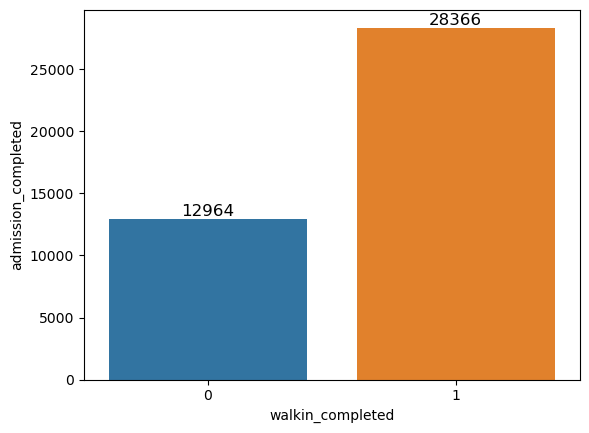

In [16]:
counts = new_df.groupby('walkin_completed')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='walkin_completed', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Comparing Application vs Admission Done

In [17]:
new_df = df[['application_completed','admission_completed']]

In [18]:
new_df

,application_completed,admission_completed
38413,True,True
16843,True,True
39157,True,True
17445,True,True
14649,True,True
...,...,...
27685,True,True
16595,True,True
35014,True,True
22903,True,True


In [19]:
new_df = new_df.replace({True: 1, False: 0})

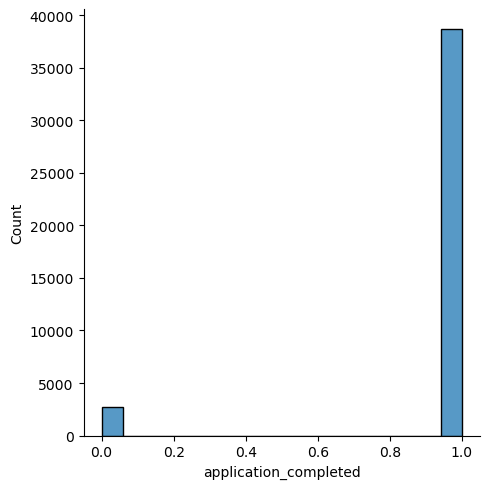

In [20]:
sns.displot(new_df['application_completed'])

In [23]:
new_df[new_df['application_completed']==0]['admission_completed'].sum() # total admission done without application

2679

In [24]:
new_df[new_df['application_completed']==1]['admission_completed'].sum() # total application done and admission done

38651

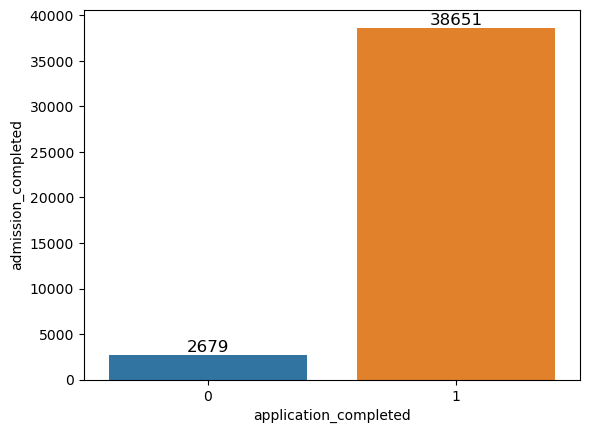

In [26]:
counts = new_df.groupby('application_completed')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='application_completed', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Comparing Pre School Tieup vs Admissions Done

In [27]:
new_df = df[['pre_school_tieup_id','admission_completed']]

In [28]:
new_df

,pre_school_tieup_id,admission_completed
38413,13796.0,True
16843,13828.0,True
39157,802.0,True
17445,NaN,True
14649,NaN,True
...,...,...
27685,14292.0,True
16595,NaN,True
35014,16015.0,True
22903,NaN,True


In [29]:
new_df['pre_school_tieup_id'] =  (~df['pre_school_tieup_id'].isna()).astype(int)

/tmp/ipykernel_120793/2509143973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['pre_school_tieup_id'] =  (~df['pre_school_tieup_id'].isna()).astype(int)


In [30]:
new_df = new_df.replace({True:1,False:0})

In [31]:
new_df

,pre_school_tieup_id,admission_completed
38413,1,1
16843,1,1
39157,1,1
17445,0,1
14649,0,1
...,...,...
27685,1,1
16595,0,1
35014,1,1
22903,0,1


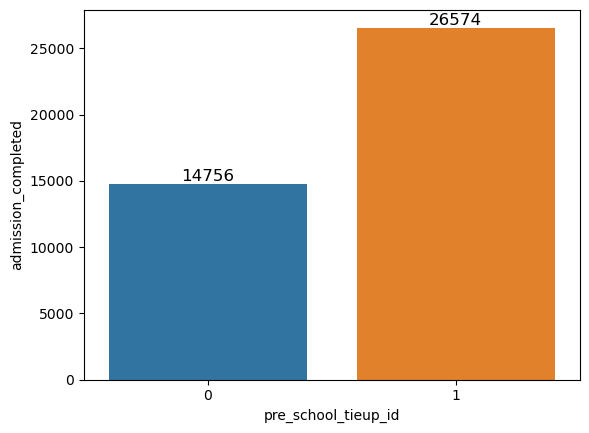

In [32]:
counts = new_df.groupby('pre_school_tieup_id')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='pre_school_tieup_id', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [33]:
new_df[new_df['pre_school_tieup_id']==1]['admission_completed'].sum() # total admission done with pre school tieup

26574

In [34]:
new_df[new_df['pre_school_tieup_id']==0]['admission_completed'].sum() # total admission done without pre school tieup

14756

# Comparing Registration vs Admission Done

In [35]:
new_df = df[['registration_completed','admission_completed']]

In [36]:
new_df

,registration_completed,admission_completed
38413,True,True
16843,True,True
39157,True,True
17445,True,True
14649,True,True
...,...,...
27685,True,True
16595,True,True
35014,True,True
22903,True,True


In [37]:
new_df = new_df.replace({True:1,False:0})

In [38]:
new_df

,registration_completed,admission_completed
38413,1,1
16843,1,1
39157,1,1
17445,1,1
14649,1,1
...,...,...
27685,1,1
16595,1,1
35014,1,1
22903,1,1


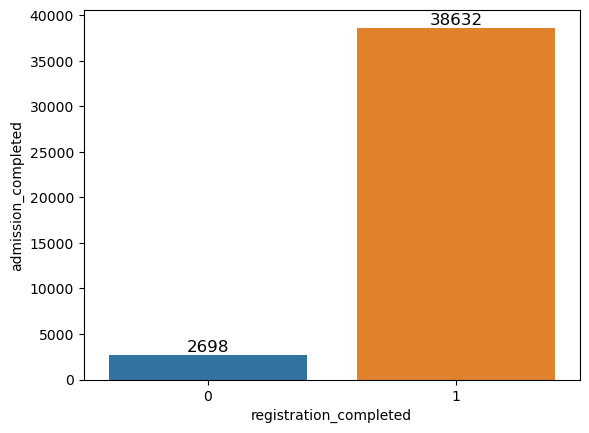

In [39]:
counts = new_df.groupby('registration_completed')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='registration_completed', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [43]:
new_df=df[['call_count','admission_completed']]

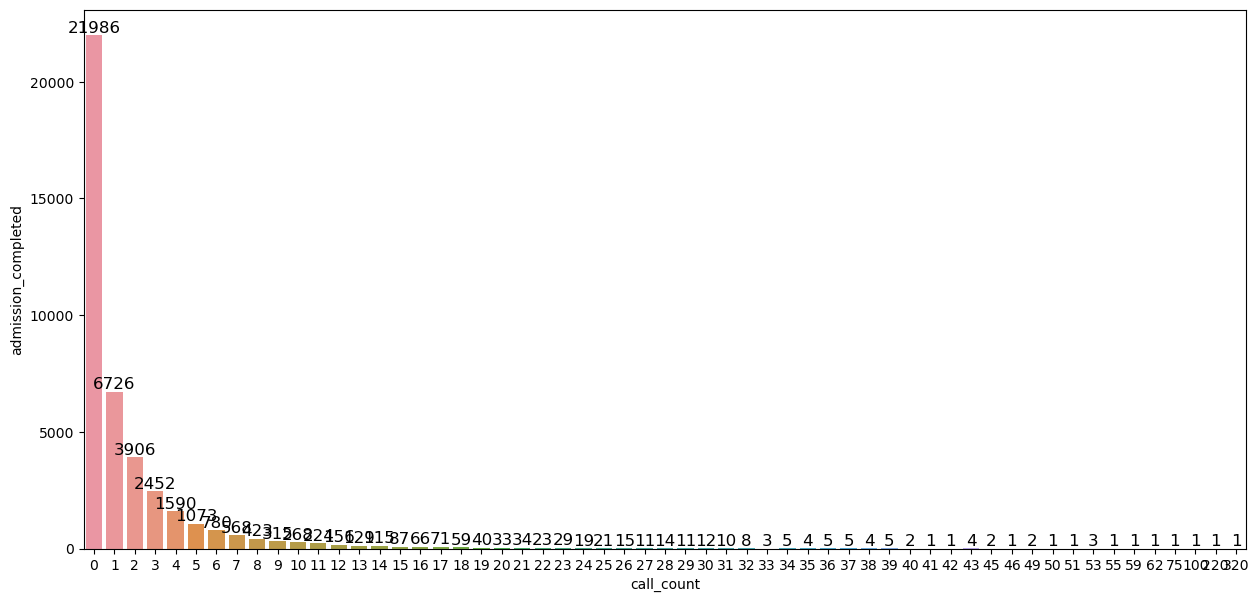

In [48]:
plt.figure(figsize=(15,7))
counts = new_df.groupby('call_count')['admission_completed'].sum().reset_index()

ax = sns.barplot(x='call_count', y='admission_completed', data=counts)
for idx, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{counts.iloc[idx, 1]}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [49]:
df['admission_completed'].count()

41330